<div align="center">
  <b> <font size="6">Simple Gradient Descent for a Math Equation</font> </b>
</div>

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt 

### 1. Gradient descent to find an optimal value for single variable in a function

\begin{equation}
f(x) = x^2
\end{equation}

##### Dataset

In [2]:
# Dataset
x = np.linspace(-50,50,100)  # generating 100 x values
y = x*x                      # finding y for each x by squaring it

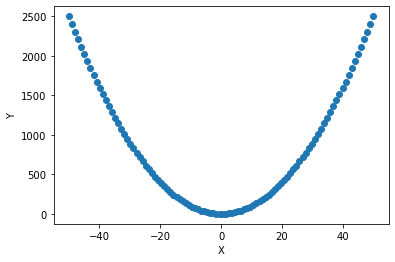

In [3]:
# Scatter plot
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

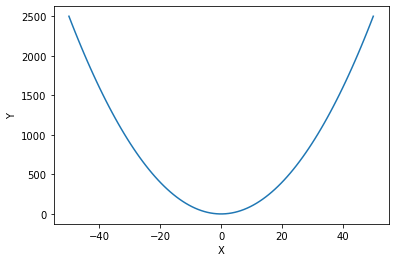

In [4]:
# Line plot: data points can be connected with a line that can help us to approximate y value for x that is not in the 100 values
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Objective is to find the x value between -50 to 50 that provides least value for the function 
\begin{equation}
f(x) = x^2
\end{equation}

##### Parameter initialization

In [5]:
# np.random.seed(13)
# range for input x
bounds = np.asarray([[-50, 50]])
# number of iterations (epochs)
epoch = 1000
# learning rate
learn_rate = 0.01

##### Objective and Derivative function

In [6]:
# Objective function
def objective(x):
    return x**2 

# Derivative of objective function
def derivative(x):
    return 2 * x

##### Gradient descent algorithm for 1 parameter

In [7]:
# Gradient descent algorithm
def gradient_descent():
    # track all solutions
    solutions, scores = list(), list()
    
    # generate an initial point for x between the values given within bounds
    curr_soln = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0]) 
    
    # run the gradient descent
    for i in range(epoch):
        
        # solution evaluation
        solution_eval = objective(curr_soln)
        
        # gradient calculation
        gradient = derivative(curr_soln)
        
        # step size calculation
        step_size = learn_rate * gradient
        
        # solution update
        curr_soln = curr_soln - step_size
               
        # store the solution
        solutions.append(curr_soln)
        scores.append(solution_eval)
        
        # report the progress
        # print('epoch >%d => f(%s) = %.5f' % (i, curr_soln, solution_eval))
        
    return [solutions, scores]

##### Training

In [8]:
# perform the gradient descent search
solutions, scores = gradient_descent()

##### Solution

In [9]:
solutions[epoch-1]

array([2.0154804e-08])

##### Convergence plot

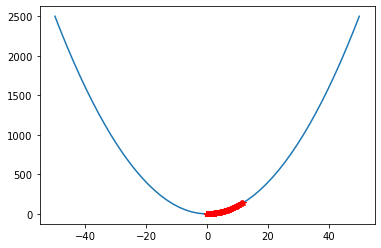

In [10]:
# sample input range uniformly at 0.1 increments
inputs = np.linspace(bounds[0,0], bounds[0,1], 50)
# compute targets
results = objective(inputs)

# create a line plot of input vs result
plt.plot(inputs, results)
# plot the solutions found
plt.plot(solutions, scores, 'r*')
plt.show()

### 2. Gradient descent to find optimal values for 2 variables in a function

\begin{equation}
f(m,b) = b^2 + m^2
\end{equation}

##### Dataset

In [11]:
m = np.linspace(-1,1,100)    # creating 100 m values
b = np.linspace(-1,1,100)    # creating 100 b values        

In [12]:
def objective(m,b):
    return m**2 + b**2

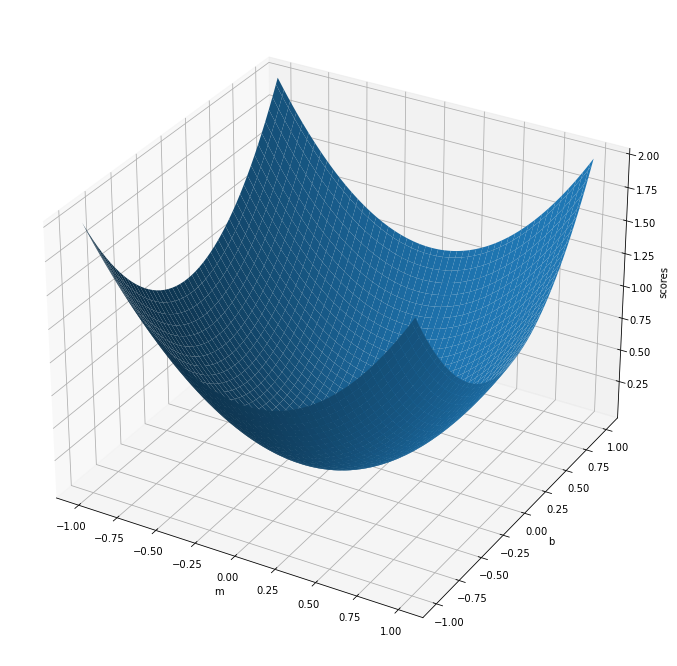

In [13]:
from mpl_toolkits.mplot3d import Axes3D   

# plotting 3D
fig = plt.figure(figsize=(30,12))
ax = plt.axes(projection = '3d')

axis_m, axis_b = np.meshgrid(m, b) 
axis_scores = objective(axis_m,axis_b)
ax.plot_surface(axis_m, axis_b,axis_scores) 

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('scores') 
plt.show() 

Objective is to find optimal values for m and b between -50 to 50 that provides least value for the function 
\begin{equation}
f(m,b) = b^2 + m^2
\end{equation}

##### Parameter initialization

In [14]:
# np.random.seed(13)
# define range for input
bounds = np.asarray([[-50, 50]])
# number of iterations (epochs)
epoch = 100
# learning rate
learn_rate = 0.01

##### Objective and Derivative function

In [15]:
# Objective function  
def objective(m,b):
    return m**2 + b**2

In [16]:
# Partial derivative of f(m,b) with respect to m
def deriv_m(m):
    return 2*m 

# Partial derivative of f(m,b) with respect to m
def deriv_b(b):
    return 2*b 

##### Gradient descent algorithm for 2 parameters

In [17]:
# Gradient descent algorithm
def gradient_descent():
    # track all solutions
    solutions_m, solutions_b, scores = list(), list(), list()
    
    # generate an initial point for x between the values given within bounds
    curr_soln_m = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0]) 
    curr_soln_b = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0]) 
    
    # run the gradient descent
    for i in range(epoch):  
        
        # solution evaluation
        solution_eval = objective(curr_soln_m, curr_soln_b)
        
        # gradient calculation
        gradient_m = deriv_m(curr_soln_m)
        gradient_b = deriv_b(curr_soln_b)
        
        # step size calculation
        step_size_m = learn_rate * gradient_m
        step_size_b = learn_rate * gradient_b  
        
        # solution update
        curr_soln_m = curr_soln_m - step_size_m 
        curr_soln_b = curr_soln_b - step_size_b  
        
        # store the solution
        solutions_m.append(curr_soln_m)
        solutions_b.append(curr_soln_b)
        scores.append(solution_eval)
        
        # report the progress
        # print('>epoch %d => f(%.5f  %.5f) = %.5f' % (i, curr_soln_m, curr_soln_b, solution_eval))
        
    return [solutions_m, solutions_b, scores]

##### Training

In [18]:
# perform the gradient descent search
solutions_m, solutions_b, scores = gradient_descent()

##### Soution

In [19]:
print("Solution for m = ",solutions_m[epoch-1])
print("Solution for b = ",solutions_b[epoch-1])

Solution for m =  [1.3228589]
Solution for b =  [-2.95775758]


##### Convergence plot

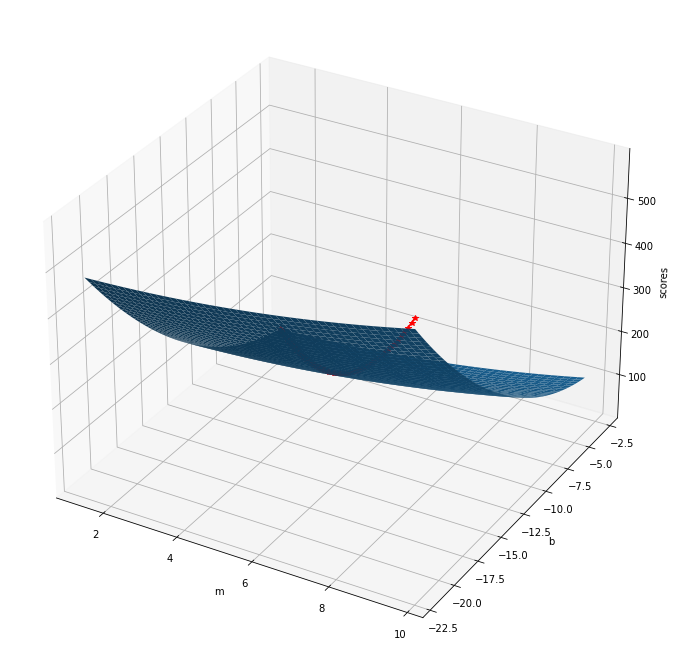

In [20]:
from mpl_toolkits.mplot3d import Axes3D   

# setting up x and y axis tick value range
bounds_m = np.asarray([[min(solutions_m), max(solutions_m)]])
bounds_b = np.asarray([[min(solutions_b), max(solutions_b)]])

# generating tick values
axis_m = np.linspace(bounds_m[0,0], bounds_m[0,1], 50)
axis_b = np.linspace(bounds_b[0,0], bounds_b[0,1], 50)

# to plot line in 3D with our outcome values
solutions_m = np.array(solutions_m).flatten()
solutions_b = np.array(solutions_b).flatten()
scores = np.array(scores).flatten() 

# plotting 3D
fig = plt.figure(figsize=(30,12))
ax = plt.axes(projection = '3d')

axis_m, axis_b = np.meshgrid(axis_m, axis_b) 
axis_scores = objective(axis_m,axis_b)

ax.plot_surface(axis_m, axis_b,axis_scores)
ax.plot3D(solutions_m,solutions_b,scores,'r*-')

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('scores') 
plt.show() 

### 3. Gradient descent to find optimal value for b and m in SSE

##### Objective is to find the optimal values for m and b that causes least SSE
SSE is 
\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}
Partial derivative of m is 
\begin{equation}
\frac{\partial}{\partial m} SSE(m,b) = -2 * \sum_{i=1}^{n}x_{i}(y_{i}-(m*x_{i}+b))
\end{equation}
Partial derivative of b is 
\begin{equation}
\frac{\partial}{\partial b} SSE(m,b) = -2 * \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))
\end{equation}

##### Dataset

In [21]:
# Dataset
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

##### Parameter initialization

In [22]:
# np.random.seed(13)
# total iterations (epoch)
epoch = 1000
# learning rate
learn_rate = 0.001

##### Objective, Derivative, Loss (error/cost) function

In [23]:
# Prediction function  
def predict(m, b, x):
    return m*x+b

In [24]:
# Partial derivative of SSE(m,b) with respect to m
def deriv_m(x, y, y_predicted):
    return -2*(x*(y-y_predicted)).sum() 

# Partial derivative of SSE(m,b) with respect to m
def deriv_b(x, y, y_predicted):
    return  -2*(y-y_predicted).sum() 

In [25]:
# SSE (cost/loss/error) calculation
def cost_fun(y,y_predicted):
    error = (y-y_predicted)**2  
    SSE = error.sum()
    return SSE

##### Gradient descent algorithm for 2 parameters

In [26]:
# Gradient descent algorithm
def gradient_descent():
    # track all solutions
    solutions_m, solutions_b, cost = list(), list(), list()
    
    # generate an initial point for x between the values given within bounds
    curr_soln_m = 1
    curr_soln_b = 0
    
    # run the gradient descent
    for i in range(epoch): 
        
        # prediction
        y_predicted = predict(curr_soln_m, curr_soln_b, x)
        
        # gradient calculation
        gradient_m = deriv_m(x, y, y_predicted)
        gradient_b = deriv_b(x, y, y_predicted)
        
        # step size calculation
        step_size_m = learn_rate * gradient_m
        step_size_b = learn_rate * gradient_b    
        
        # solution update
        curr_soln_m = curr_soln_m - step_size_m 
        curr_soln_b = curr_soln_b - step_size_b 
       
        # SSE (error/cost/loss) calculation
        SSE = cost_fun(y,y_predicted)
        
        # store the solution
        solutions_m.append(curr_soln_m)
        solutions_b.append(curr_soln_b) 
        cost.append(SSE)
        
        # report the progress
        # print('>epoch %d => m %.5f b %.5f cost %.3f ' % (i, curr_soln_m, curr_soln_b,SSE))
        
    return [solutions_m, solutions_b, cost]

##### Training

In [27]:
# perform the gradient descent search
solutions_m, solutions_b, cost = gradient_descent()

##### Solution

In [28]:
m = solutions_m[epoch-1]
b = solutions_b[epoch-1]
print("y = m x + b ==>  y = ",round(m,2)," x + ",round(b,2))

y = m x + b ==>  y =  2.13  x +  2.53


##### SSE (cost/error/loss) convergence graph

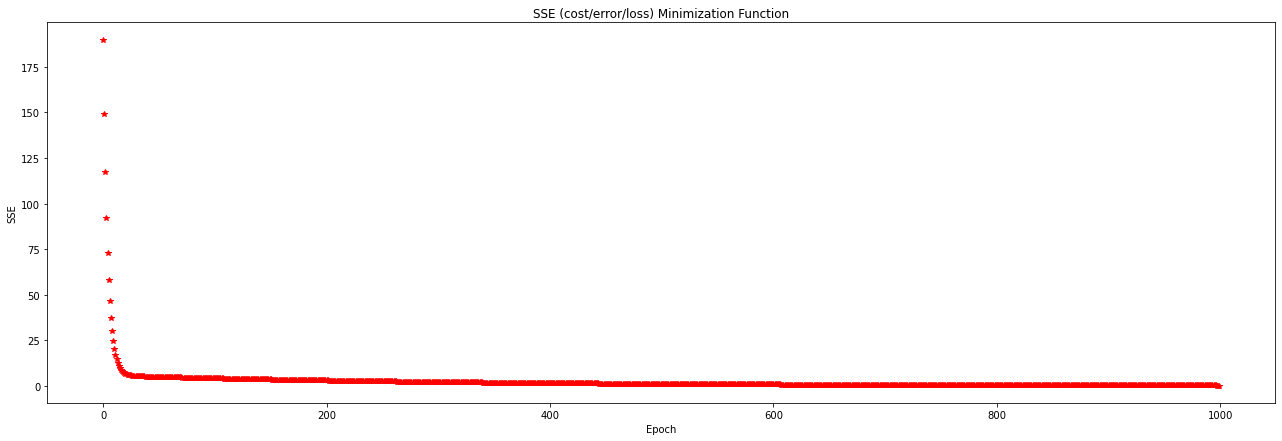

In [29]:
# Plotting SSE function minimization
x = np.arange(epoch) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,cost,"r*")  
plt.xlabel("Epoch")
plt.ylabel("SSE")  
plt.title("SSE (cost/error/loss) Minimization Function")
plt.show() 

##### Slope(m) and intercept(b) convergence graph

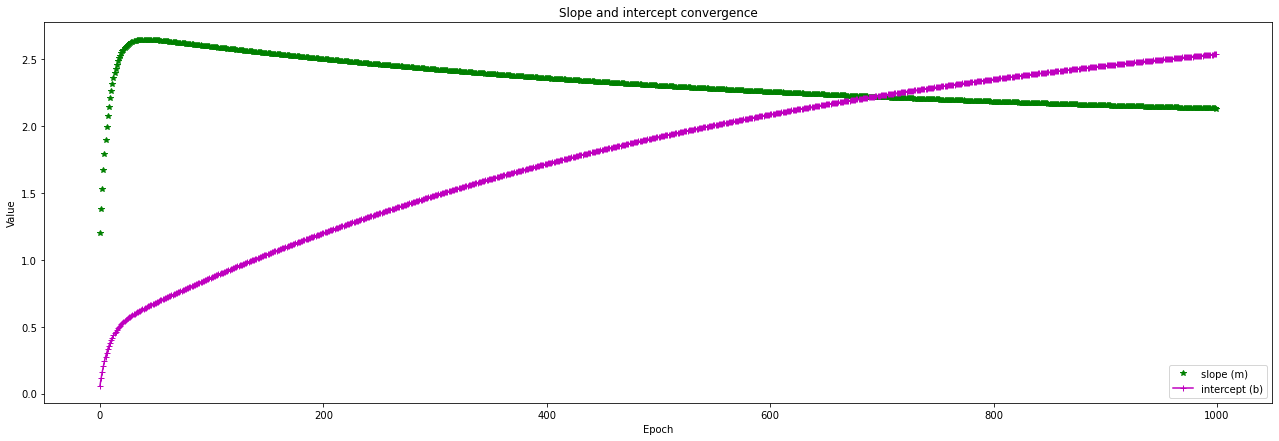

In [30]:
# Plotting slope (m) and intercept (b) convergence
x = np.arange(epoch) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,solutions_m,"g*",label="slope (m)") 
plt.plot(x,solutions_b,"m+-",label="intercept (b)") 
plt.xlabel("Epoch")
plt.ylabel("Value")  
plt.title("Slope and intercept convergence")
plt.legend(loc="best")
plt.show() 